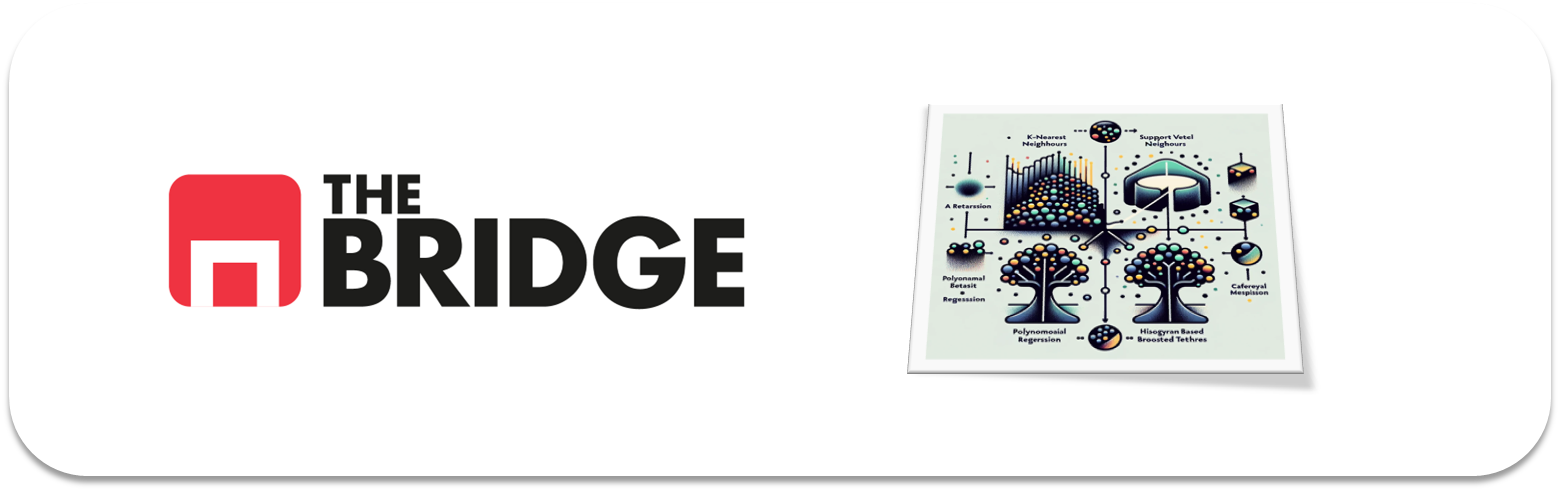

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [136]:
import bootcampviztools as bt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, roc_curve, auc, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import BayesianRidge, RidgeCV, LinearRegression, LogisticRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn import metrics

from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [98]:
data = pd.read_csv('data/wines_dataset.csv', sep='|')

In [99]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.210,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.160,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.180,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.630,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
5,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white
6,6.6,0.210,0.31,11.40,0.039,46.0,165.0,0.99795,3.41,0.44,9.8,7,white
7,6.7,0.310,0.30,2.10,0.038,18.0,130.0,0.99280,3.36,0.63,10.6,6,white
8,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.5,5,red
9,7.5,0.420,0.20,1.40,0.060,15.0,168.0,0.99440,3.06,0.40,9.4,6,white


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [101]:
target_clasificacion = 'quality'

target_regresion = 'alcohol'


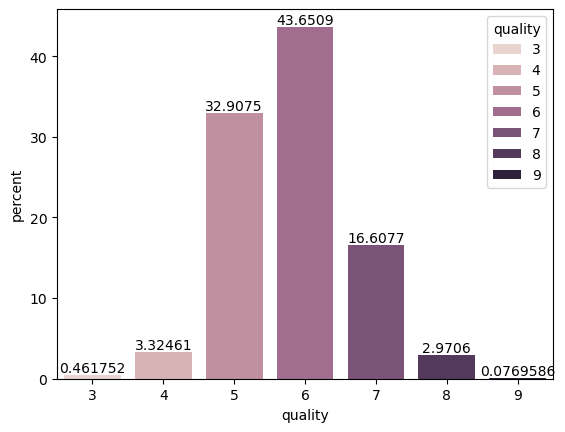

In [102]:
ax = sns.countplot(data=data, x=target_clasificacion, hue=target_clasificacion, stat='percent')
for container in ax.containers:
    ax.bar_label(container)

Proporción desbalanceada: Las clases 5 y 6 juntas suponen un 75% del total, mientras que tanto 3 como 9 juntas no llegan ni al 1%.

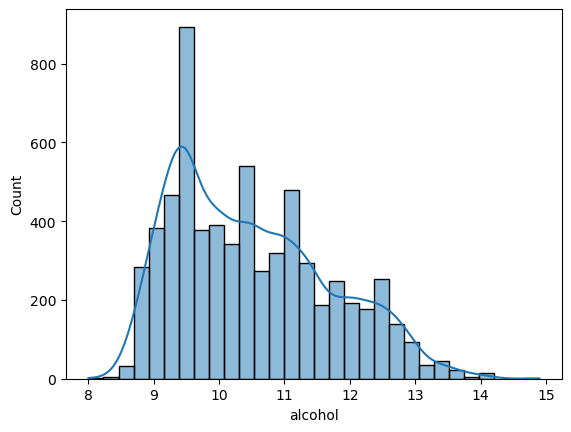

In [103]:
ax = sns.histplot(data=data, x=target_regresion, kde=True, bins = 30)

También tenemos una distribución desigual: hay una marcada tendencia entorno a una gradación de 9 con algo, aunque los valores oscilen entre 8 y 15 grados de alcohol.

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [104]:
train_set, test_set = train_test_split(data, test_size=0.1, random_state=42)

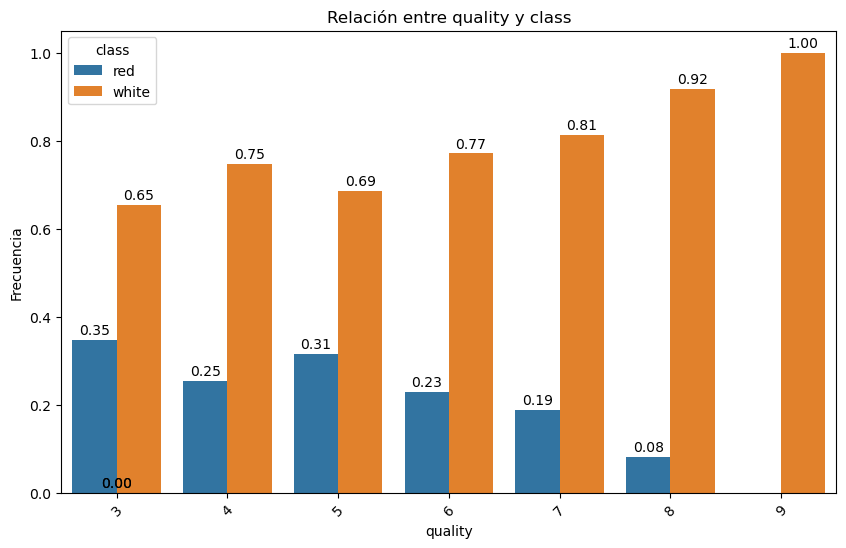

In [105]:
# Class es la única categórica:

bt.plot_categorical_relationship_fin(train_set, target_clasificacion, 'class', show_values= True, relative_freq= True, size_group=7)

Vemos que la proporción se hace más desigual a medida que aumenta la calidad, aunque no de forma consistente: las clases 3 y 5 son más parecidas entre sí que cualquiera de ellas dos con 4; del mismo modo que 4 y 6 son muy parecidas entre sí, más que cualquiera de ellas con 5. Si solo usaramos este criterio, habría mucha confusión entre estos pares de clases.

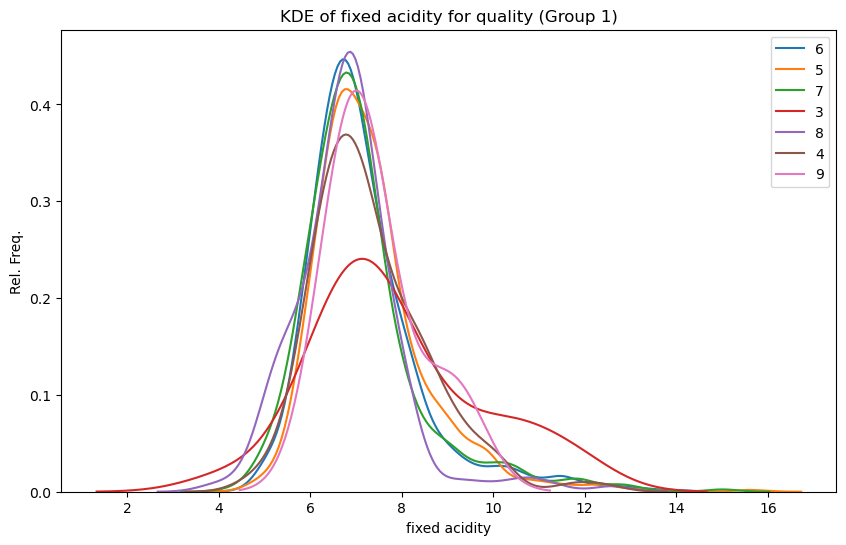

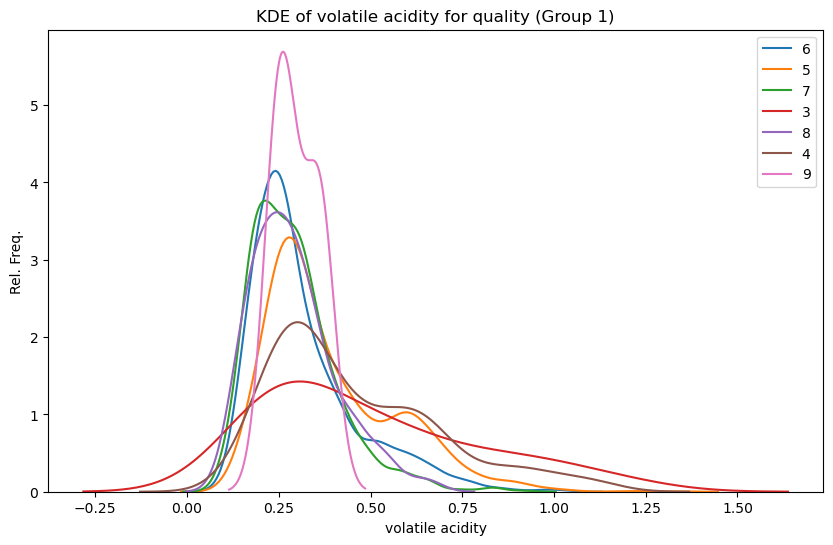

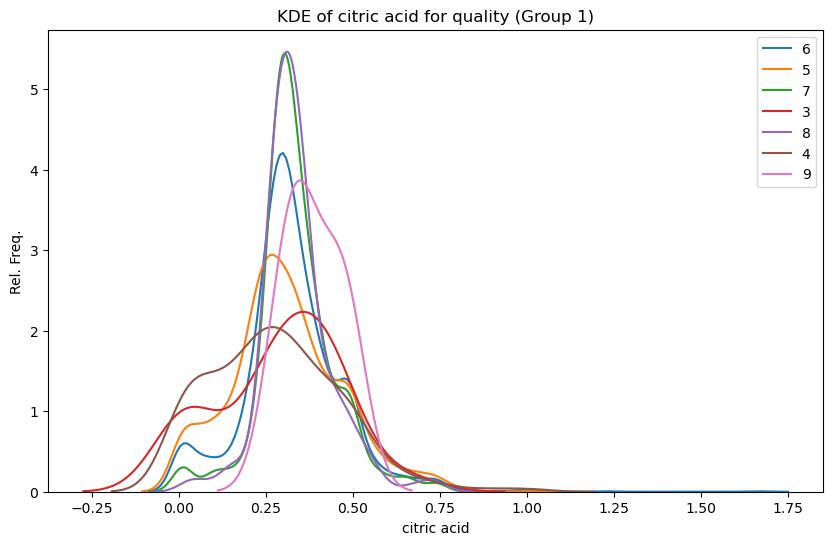

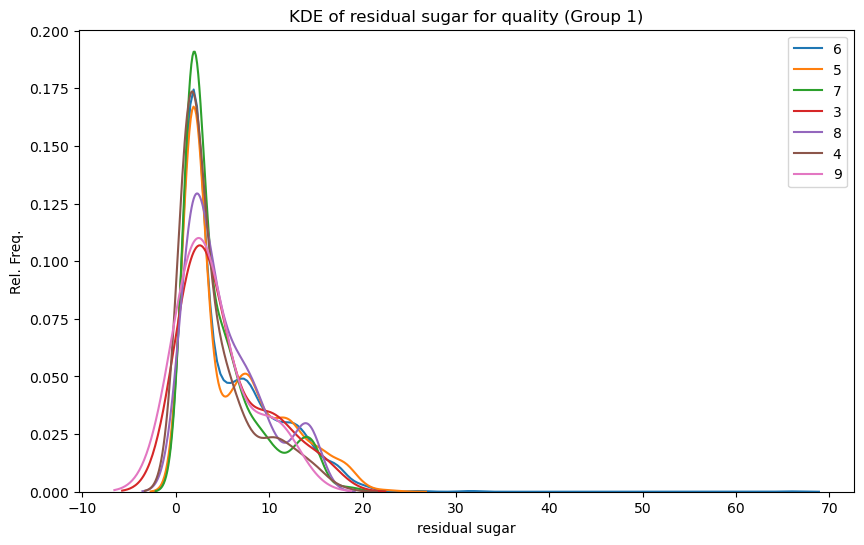

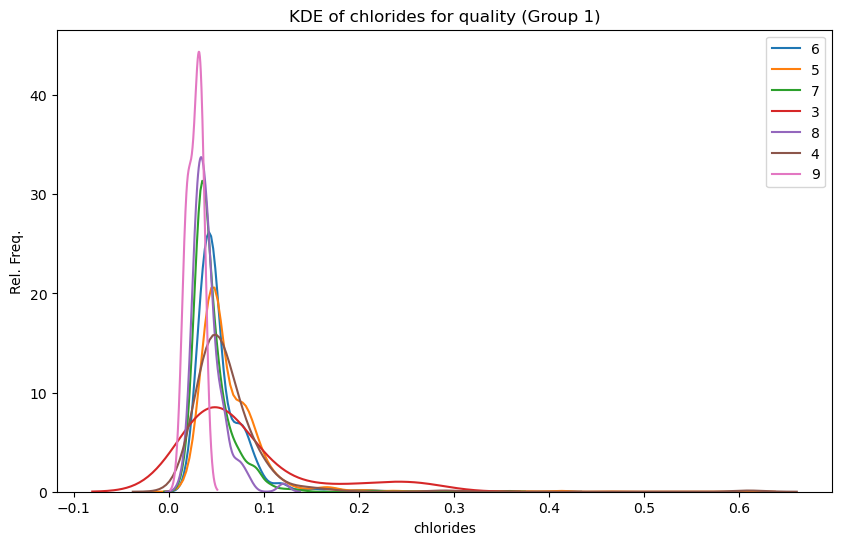

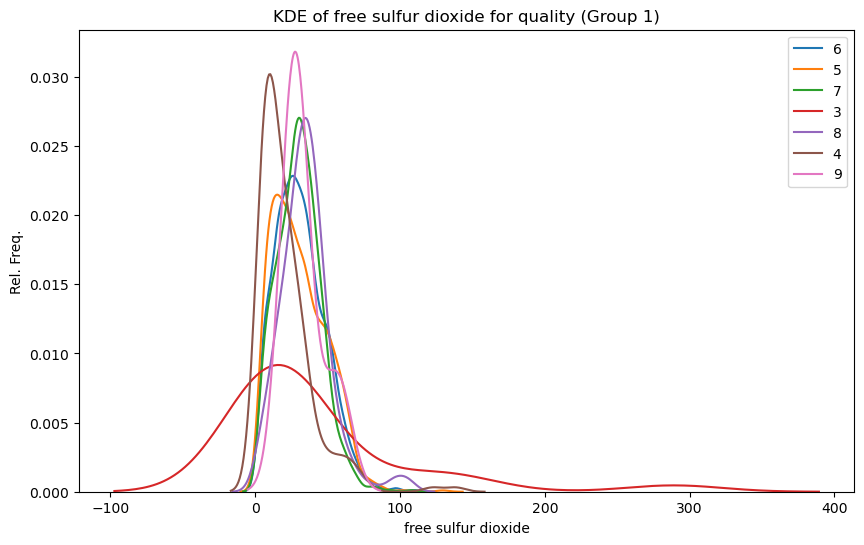

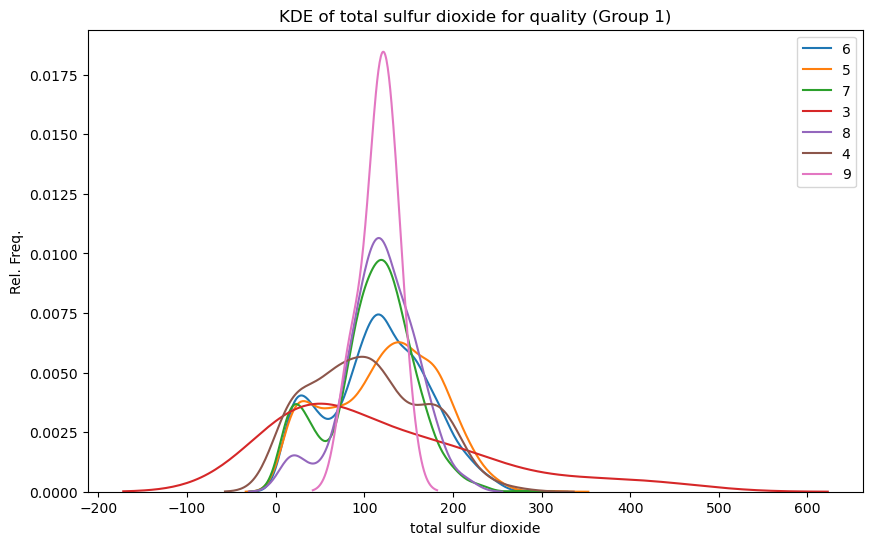

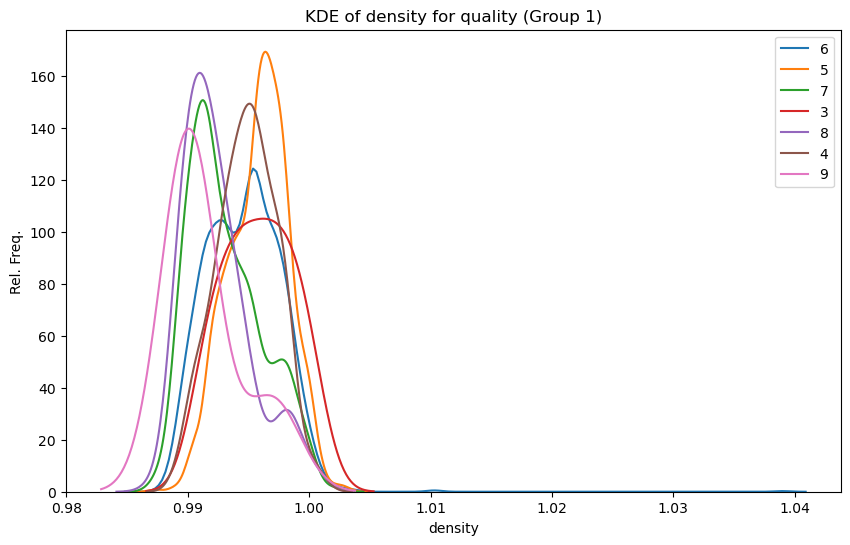

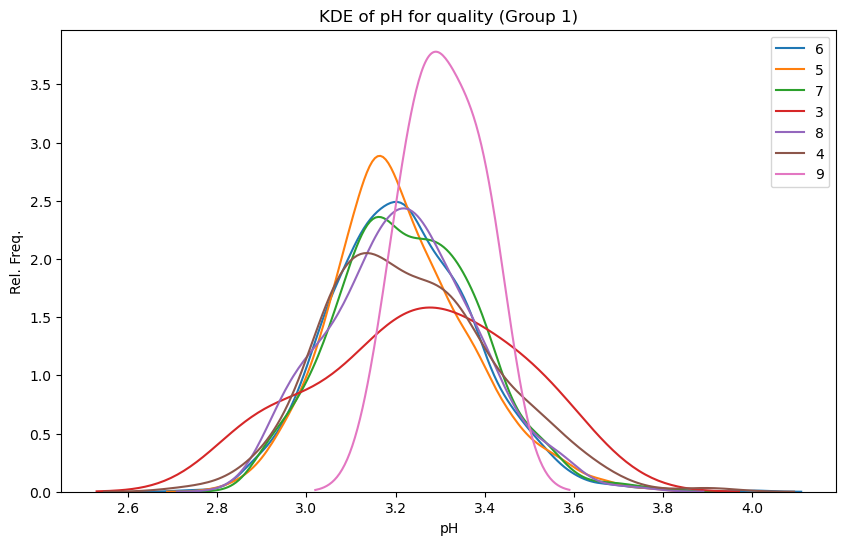

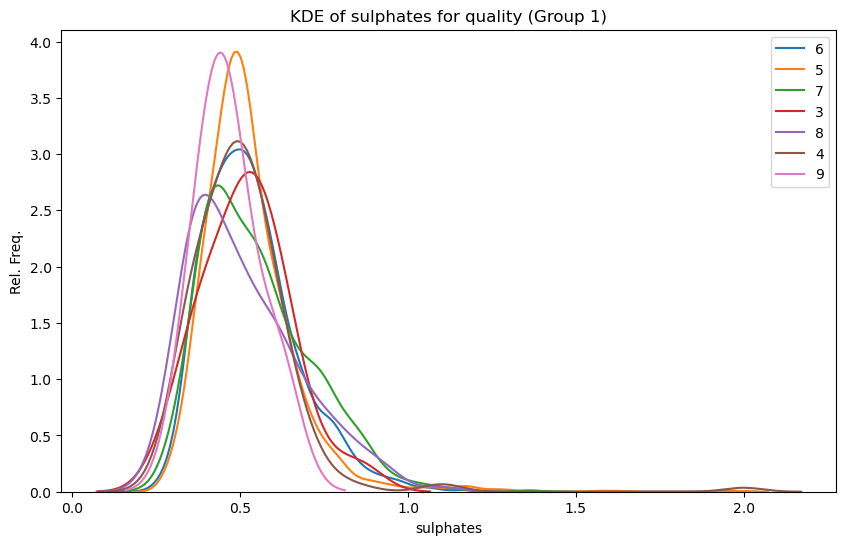

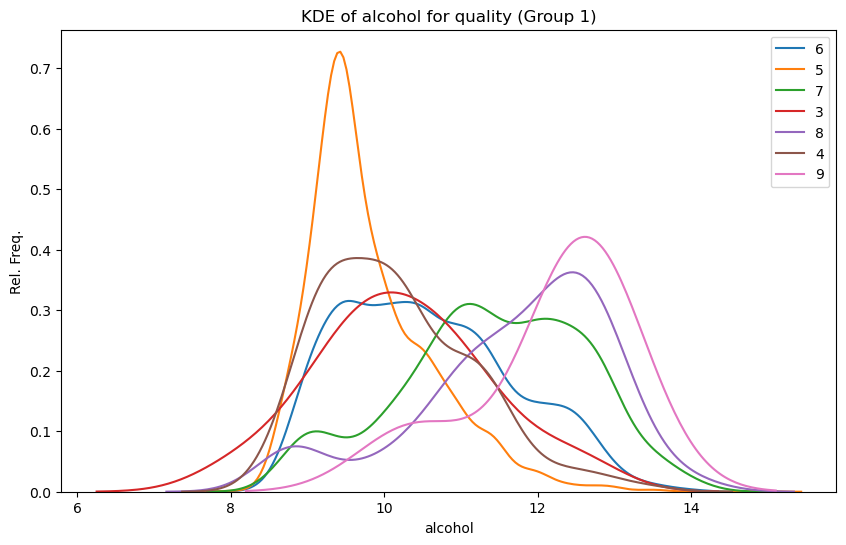

In [106]:
# Numéricas:

for col in data.drop(['class', target_clasificacion], axis=1):
    bt.plot_grouped_kde(train_set, cat_col=target_clasificacion, num_col=col, group_size=7)

Parece que todas pueden aportar información para distinguir al menos una clase del resto, por el momento no descartaremos ninguna variable.

In [107]:
# Pasamos 'class' a Bool

train_set['class'] = (train_set['class'] == 'white').astype(int)
test_set['class'] = (test_set['class'] == 'white').astype(int)

In [108]:
# Escalamos

scaler = StandardScaler()
nums = data.drop(['class', target_clasificacion], axis=1).columns
train_scaled = train_set.copy()
train_scaled[nums] = scaler.fit_transform(train_set[nums].copy())
test_scaled = test_set.copy()
test_scaled[nums] = scaler.fit_transform(test_set[nums].copy())

In [109]:
# Separamos en X, y

train_X = train_scaled.copy().drop(target_clasificacion, axis=1)
train_y = train_scaled[target_clasificacion]

test_X = test_scaled.copy().drop(target_clasificacion, axis=1)
test_y = test_scaled[target_clasificacion]

In [110]:
# Cross-validation para varios modelos

KNC_5 = KNeighborsClassifier(n_neighbors=5)
KNC_10 = KNeighborsClassifier(n_neighbors=10)
LR = LogisticRegression(max_iter=1000)
DTC = DecisionTreeClassifier(random_state = 42)
RFC = RandomForestClassifier(random_state = 42)
LGBMC = LGBMClassifier(max_depth=10, random_state = 42, verbose = -100)

clf_models = [KNC_5, KNC_10, LR, DTC, RFC, LGBMC]

for model in clf_models:
    print(model, cross_validate(model, train_X, train_y, scoring='balanced_accuracy', cv=5)['test_score'].mean(), sep='\t', end='\n\n')

KNeighborsClassifier()	0.26501708578265487

KNeighborsClassifier(n_neighbors=10)	0.25381727126474757

LogisticRegression(max_iter=1000)	0.2245722420132466

DecisionTreeClassifier(random_state=42)	0.35619871411378884

RandomForestClassifier(random_state=42)	0.35581793539154855

LGBMClassifier(max_depth=10, random_state=42, verbose=-100)	0.35953392729466194



Los resultados son malos debido al desbalanceo de clases

In [111]:
KNC_5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNC_10 = KNeighborsClassifier(n_neighbors=10, weights='distance')
LR = LogisticRegression(max_iter=10000, class_weight='balanced')
DTC = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
RFC = RandomForestClassifier(random_state = 42, class_weight='balanced')
LGBMC = LGBMClassifier(max_depth=10, random_state = 42, verbose = -100, class_weight='balanced')

clf_models = [KNC_5, KNC_10, LR, DTC, RFC, LGBMC]

for model in clf_models:
    print(model, cross_validate(model, train_X, train_y, scoring='balanced_accuracy', cv=5)['test_score'].mean(), sep='\t', end='\n\n')

KNeighborsClassifier(weights='distance')	0.36270788862874087

KNeighborsClassifier(n_neighbors=10, weights='distance')	0.35767219026286456

LogisticRegression(class_weight='balanced', max_iter=10000)	0.3848627047115395

DecisionTreeClassifier(class_weight='balanced', random_state=42)	0.34718672880510615

RandomForestClassifier(class_weight='balanced', random_state=42)	0.3506216574482403

LGBMClassifier(class_weight='balanced', max_depth=10, random_state=42,
               verbose=-100)	0.3787302164232623



Mejoría sustancial aunque las métricas siguen siendo bajas. Los árboles y bosques no mejoran ya que son algoritmos que son insensibles al desbalanceo.

In [112]:
# Optimixtación

LGBMC = LGBMClassifier(random_state = 42, verbose = -100)

LGBM_param_grid = {
    'learning_rate': [0.1, 1, 0.01],
    'max_depth': [-1, 10, 20, 30],
    'n_estimators': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

LGBM_grid = GridSearchCV(LGBMC, param_grid=LGBM_param_grid, cv=5, scoring='balanced_accuracy')

LGBM_grid.fit(train_X, train_y)

In [113]:
LGBM_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 300}

In [114]:
LGBM_grid.best_score_

0.3840164556936858

In [115]:
LGBMC = LGBMClassifier(learning_rate=0.01, max_depth=20, n_estimators=200)

LGBMC.fit(train_X, train_y)

y_pred = LGBMC.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.11      0.18        18
           5       0.66      0.66      0.66       207
           6       0.59      0.76      0.66       294
           7       0.51      0.29      0.37       105
           8       1.00      0.14      0.24        22

    accuracy                           0.61       650
   macro avg       0.54      0.33      0.35       650
weighted avg       0.61      0.61      0.58       650



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


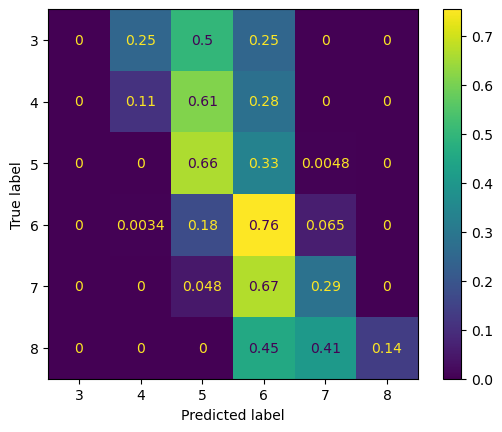

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_y, y_pred, normalize="true")

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

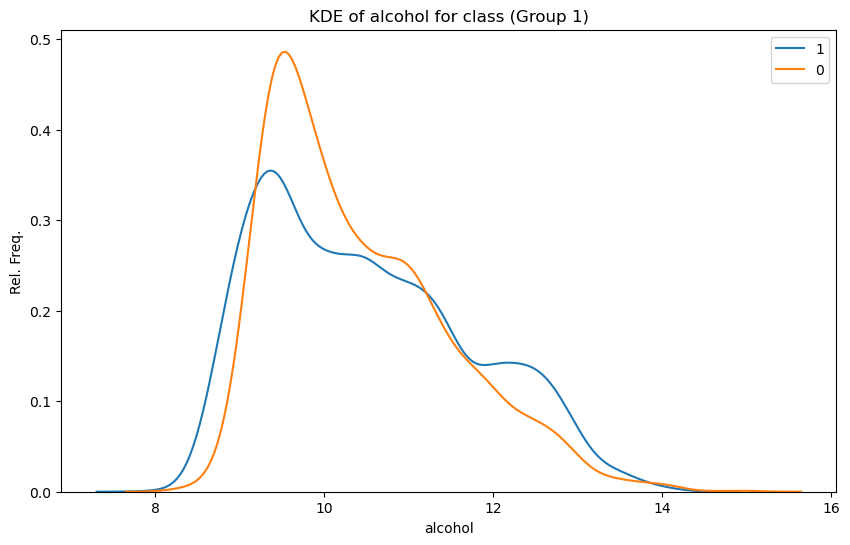

In [117]:
# Otra vez tenemos solo una categórica, pero nuestra variable objetivo ahora es numérica:
# (Trataré aquí quality como numérica a pesar de que como variable objetivo del problema de clasificación la tratamos como categórica)

bt.plot_grouped_kde(train_set, cat_col='class', num_col=target_regresion, group_size=2)

Aunque son parecidas, intersectan y hay un cambio importante en la forma entre los 11-13 grados de alcohol.

In [118]:
# Numéricas

corr = train_set.corr(numeric_only=True)
corr[target_regresion].sort_values(ascending=False, key=lambda x: abs(x))

alcohol                 1.000000
density                -0.683111
quality                 0.450342
residual sugar         -0.354421
total sulfur dioxide   -0.267825
chlorides              -0.256446
free sulfur dioxide    -0.182037
pH                      0.121113
fixed acidity          -0.094179
volatile acidity       -0.040173
class                   0.033035
citric acid            -0.008995
sulphates              -0.000925
Name: alcohol, dtype: float64

In [119]:
nums = [col for col in corr[target_regresion].index if 1 > abs(corr[target_regresion][col]) > 0.01]

In [122]:
# Transformamos la categórica (binaria) y escalamos:

train_set['class'] = (train_set['class'] == 'white').astype(int)
test_set['class'] = (test_set['class'] == 'white').astype(int)

train_X = train_set.drop(target_regresion, axis=1)
train_y = train_set[target_regresion]

test_X = test_set.drop(target_regresion, axis=1)
test_y = test_set[target_regresion]

scaler = StandardScaler()
scaler.fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X[train_X.columns]), columns= train_X.columns)


In [124]:
RFR = RandomForestRegressor(max_depth = 10, random_state= 42)
LGBMR = LGBMRegressor(max_depth = 10, random_state = 42, verbose = -100)
XGBR = XGBRegressor(max_depth = 10, random_state = 42)

reg_models = [RFR, LGBMR, XGBR]

for model in reg_models:
    print(model, -np.mean(cross_val_score(model, train_X, train_y, scoring='neg_mean_absolute_percentage_error', cv=5)), sep='\t', end='\n\n')

RandomForestRegressor(max_depth=10, random_state=42)	0.031104712720053447

LGBMRegressor(max_depth=10, random_state=42, verbose=-100)	0.02696431335508332

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)	0.023776043753004544



In [130]:
param_grid = {
    'learning_rate': [0.1, 1, 0.01],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 4, 5, 10]
}

XGBR = XGBRegressor(random_state = 42)

XGBR_grid = GridSearchCV(XGBR, param_grid= param_grid, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs= -1)

XGBR_grid.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01],
                         'max_depth': [None, 3, 4, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_percentage_error')

In [131]:
XGBR_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

In [132]:
XGBR_grid.best_score_

-0.022811805012850003

In [143]:
y_pred = XGBR_grid.best_estimator_.predict(test_X)
mean_absolute_percentage_error(y_test, y_pred)

0.020030705665496217